In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv(r'/content/csgo_round_snapshots (1).csv')

In [38]:
data.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [39]:
data.shape

(122410, 97)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [41]:
data.isna().sum() #checking for nulls

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [42]:
data.duplicated().sum() #checking for duplicates

4962

In [43]:
data.drop_duplicates(inplace = True)

In [44]:
data.shape

(117448, 97)

In [45]:
data.round_winner.value_counts() #data biasing check

T     59941
CT    57507
Name: round_winner, dtype: int64

In [46]:
data = data.reset_index()

In [47]:
index = np.random.choice(np.where(data.round_winner == 'T')[0],2434)

In [48]:
data.drop(index,axis = 0,inplace = True) #undersampling the data with respect to the terrorist win as data was biased towards it

In [49]:
data.shape

(115063, 98)

In [50]:
data.round_winner.value_counts()

T     57556
CT    57507
Name: round_winner, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
le = LabelEncoder()

In [53]:
-# Converting the boolean and object data-type to numerical data type using label encoder
for i in data.columns:
  if data[i].dtypes == 'object' or data[i].dtype == 'bool':
    data[i] = le.fit_transform(data[i])

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115063 entries, 0 to 117447
Data columns (total 98 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   index                         115063 non-null  int64  
 1   time_left                     115063 non-null  float64
 2   ct_score                      115063 non-null  float64
 3   t_score                       115063 non-null  float64
 4   map                           115063 non-null  int64  
 5   bomb_planted                  115063 non-null  int64  
 6   ct_health                     115063 non-null  float64
 7   t_health                      115063 non-null  float64
 8   ct_armor                      115063 non-null  float64
 9   t_armor                       115063 non-null  float64
 10  ct_money                      115063 non-null  float64
 11  t_money                       115063 non-null  float64
 12  ct_helmets                    115063 non-nul

In [55]:
data.drop('index',axis = 1,inplace = True)

In [56]:
x = data.drop('round_winner',axis = 1)
y = data.round_winner

In [57]:
ss = StandardScaler()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Splitting the data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [60]:
# Standard scaling the data
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [61]:
xtrain.shape,xtest.shape

((92050, 96), (23013, 96))

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
lda = LinearDiscriminantAnalysis()

In [64]:
'''Using the regular LDA will result in feature reduction to only one feature, so we will use the lda coefficients to get the features
resulting in better class sepratability'''
lda.fit(xtrain,ytrain)

LinearDiscriminantAnalysis()

In [112]:
lda.coef_

array([[ 1.36415319e-01, -1.86308040e-02,  1.22974384e-02,
        -7.93068507e-02,  2.45042295e-01, -4.63114819e-01,
         3.47330249e-01, -6.04967274e-01,  6.16694850e-01,
        -2.01906605e-01,  1.59400679e-01,  2.48425669e-02,
         1.18387463e-01, -4.88994637e-02, -1.66043948e-01,
         3.55143937e-01, -1.83199138e-01,  6.00764105e-01,
        -1.98861741e-01,  3.73094608e-02, -2.98341788e-01,
         2.41240411e-01,  1.71965397e-16, -2.13408134e-03,
         9.72447438e-03, -6.13197745e-03, -8.53644262e-03,
         2.26514528e-02, -1.41109963e-01,  4.77793861e-02,
        -2.09811647e-15,  1.98041274e-02, -4.54620400e-02,
         1.29682236e-01,  1.97090432e-02, -1.49172332e-01,
         1.67493519e-15,  1.19154139e-15, -9.54162814e-02,
         4.26362171e-02, -4.57812640e-01,  1.08545288e-01,
        -1.23720069e-02,  1.14051283e-01, -1.77769488e-02,
         5.12002122e-03, -1.49545910e-02,  3.72573725e-02,
         1.21020517e-02, -1.01968081e-02, -1.12508871e-0

In [113]:
score = np.exp(np.abs(lda.coef_)).flatten()
score

array([1.14615782, 1.01880544, 1.01237336, 1.08253645, 1.27767535,
       1.58901578, 1.41528404, 1.83119228, 1.85279415, 1.22373371,
       1.17280777, 1.02515371, 1.12568019, 1.05011477, 1.18062499,
       1.42638595, 1.20105356, 1.82351162, 1.22001328, 1.0380142 ,
       1.34762231, 1.272827  , 1.        , 1.00213636, 1.00977191,
       1.00615082, 1.00857298, 1.02290994, 1.15155127, 1.04893922,
       1.        , 1.02000153, 1.04651128, 1.13846656, 1.01990455,
       1.16087303, 1.        , 1.        , 1.10011672, 1.0435582 ,
       1.58061283, 1.11465539, 1.01244886, 1.1208096 , 1.0179359 ,
       1.00513315, 1.01506697, 1.03796013, 1.01217558, 1.01024897,
       1.11908218, 1.02985324, 1.        , 1.00779972, 1.02119043,
       1.01995181, 1.0225322 , 1.02141482, 1.        , 1.00512723,
       1.        , 1.01609125, 1.00818269, 1.01240537, 1.23006348,
       1.73158675, 1.09271168, 1.02604385, 1.04914921, 1.08913649,
       1.01327482, 1.00487197, 1.00781595, 1.00105807, 1.03115

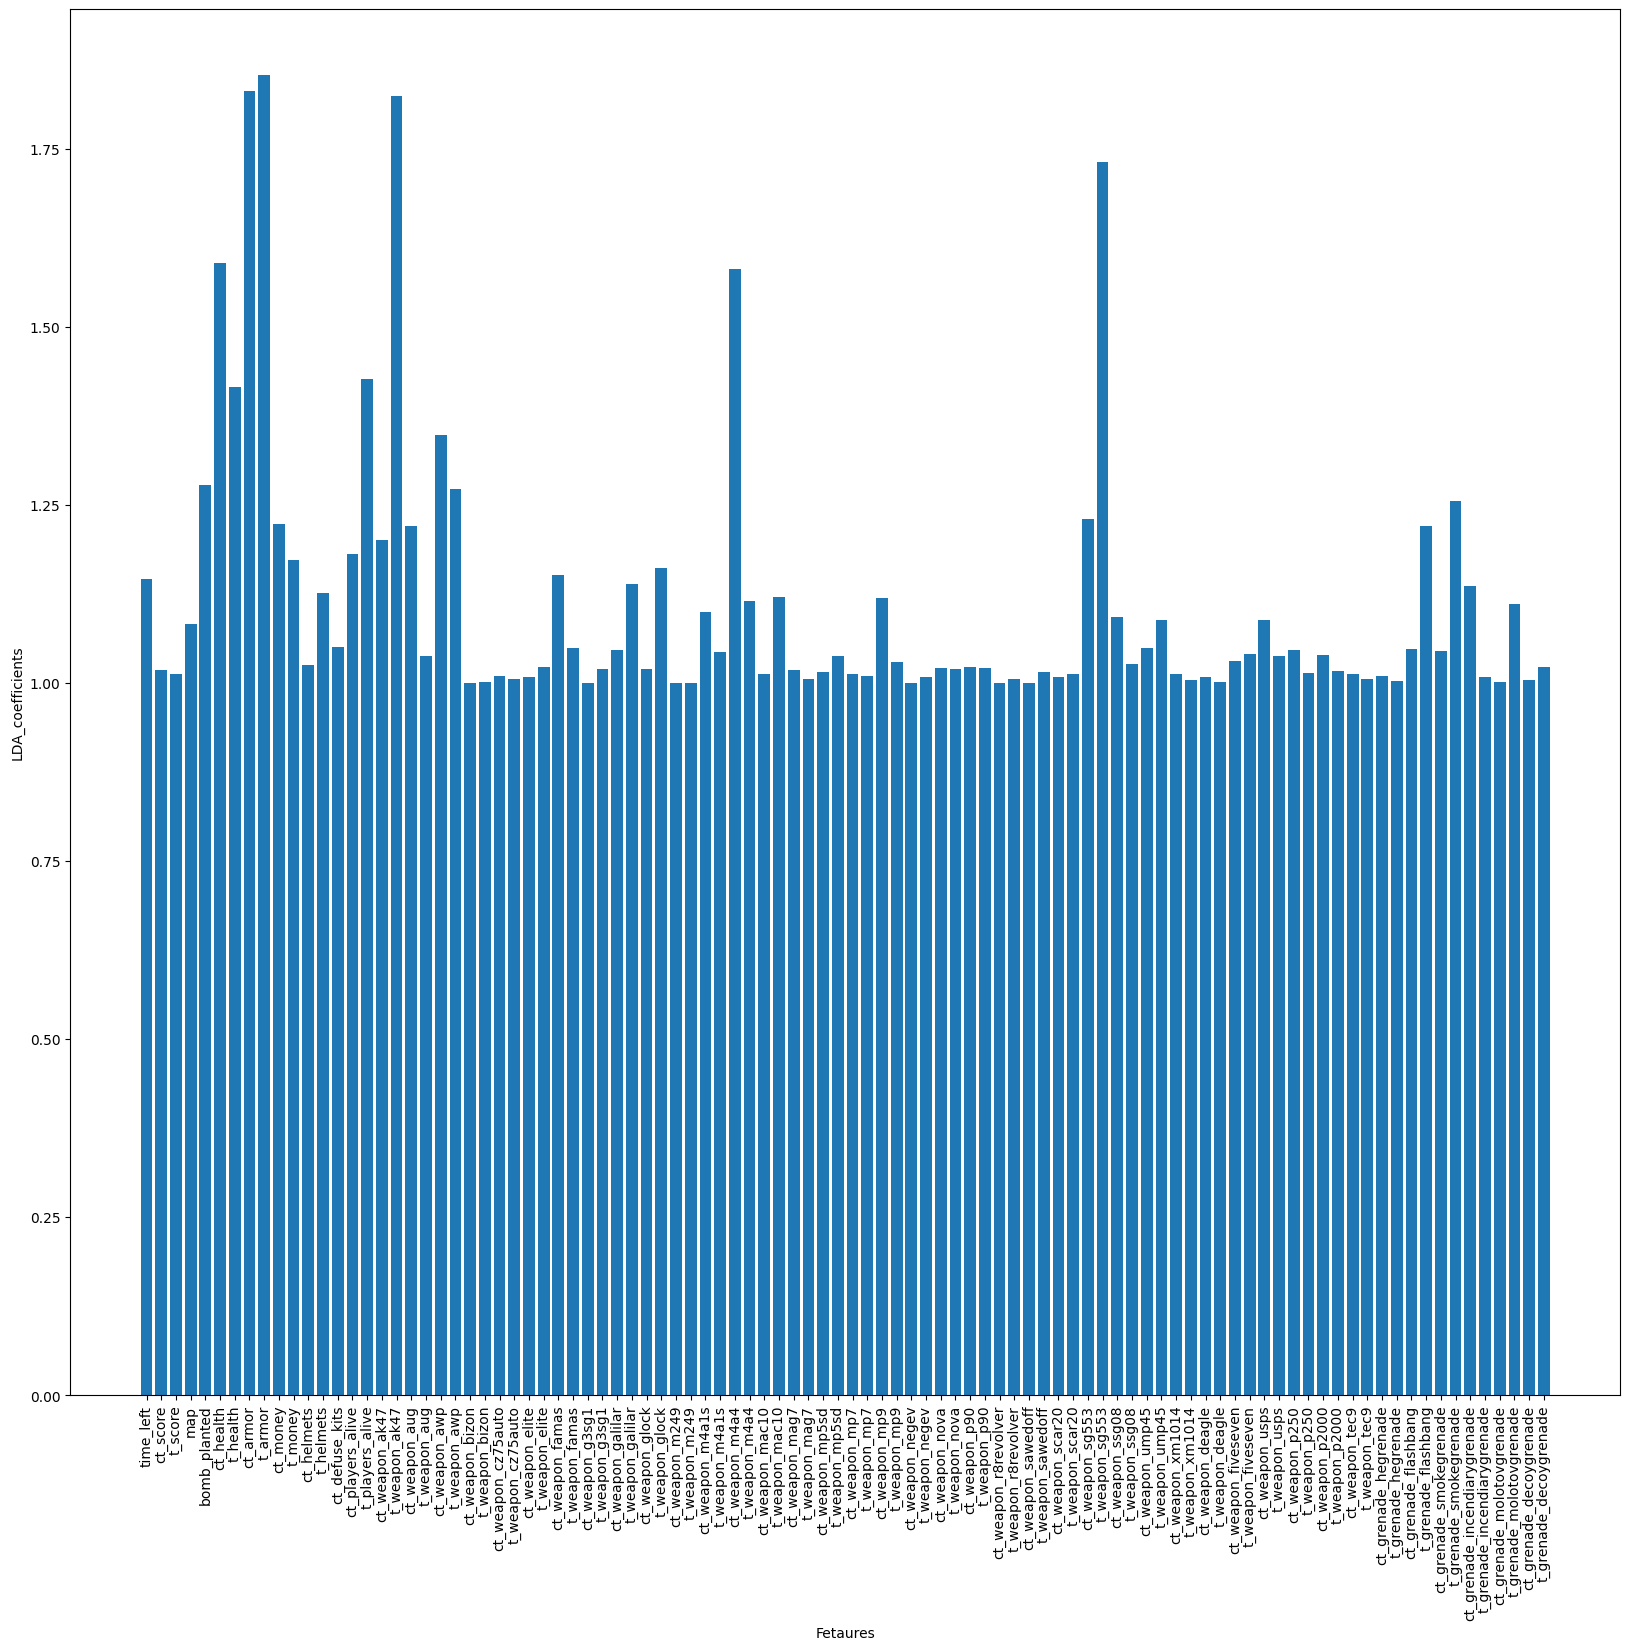

In [120]:
plt.figure(figsize = (20,18))
plt.bar(x.columns,score)
plt.xlabel('Fetaures')
plt.ylabel('LDA_coefficients')
plt.xticks(rotation = 90)
plt.show()

In [70]:
feature_score = pd.DataFrame({'feature':x.columns,'score':score})
feature_score

,feature,score
0,time_left,1.146158
1,ct_score,1.018805
2,t_score,1.012373
3,map,1.082536
4,bomb_planted,1.277675
...,...,...
91,t_grenade_incendiarygrenade,1.009122
92,ct_grenade_molotovgrenade,1.001898
93,t_grenade_molotovgrenade,1.111529
94,ct_grenade_decoygrenade,1.004198


In [72]:
feature_score.sort_values('score',ascending = False,inplace = True)
top_20 = feature_score.head(20)
top_20

,feature,score
8,t_armor,1.852794
7,ct_armor,1.831192
17,t_weapon_ak47,1.823512
65,t_weapon_sg553,1.731587
5,ct_health,1.589016
40,ct_weapon_m4a4,1.580613
15,t_players_alive,1.426386
6,t_health,1.415284
20,ct_weapon_awp,1.347622
4,bomb_planted,1.277675


In [76]:
index = top_20.index

In [79]:
xtrain = xtrain[:,index]
xtrain.shape

(92050, 20)

In [83]:
xtest = xtest[:,index]
xtest.shape

(23013, 20)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression()

In [86]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [87]:
ypred = lr.predict(xtest)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(ypred,ytest)

0.7606135662451657

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier()

In [92]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [93]:
ypred_dt = dt.predict(xtest)

In [94]:
accuracy_score(ypred_dt,ytest)

0.8144092469473776

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(n_estimators=200)

In [97]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [98]:
ypred_rf = rf.predict(xtest)

In [99]:
accuracy_score(ypred_rf,ytest)

0.8593838265328293

In [100]:
from xgboost import XGBClassifier

In [101]:
xg = XGBClassifier()

In [102]:
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
ypred_xg = xg.predict(xtest)

In [104]:
accuracy_score(ypred_xg,ytest)

0.7932907487072525

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier()

In [107]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [108]:
ypred_knn = knn.predict(xtest)

In [109]:
accuracy_score(ypred_knn,ytest)

0.7897275453004823

In [ ]:
# from the above observations we can say that the best model for this problem is Random forest giving the highest accuracy.